In [89]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv("titanic_toy.csv")

In [91]:
df.sample(5)

,Age,Fare,Family,Survived
514,24.0,7.4958,0,0
460,48.0,26.5500,0,1
614,35.0,8.0500,0,0
229,NaN,NaN,4,0
607,27.0,30.5000,0,1


In [92]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

C:\Users\solan\AppData\Local\Temp\ipykernel_19496\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

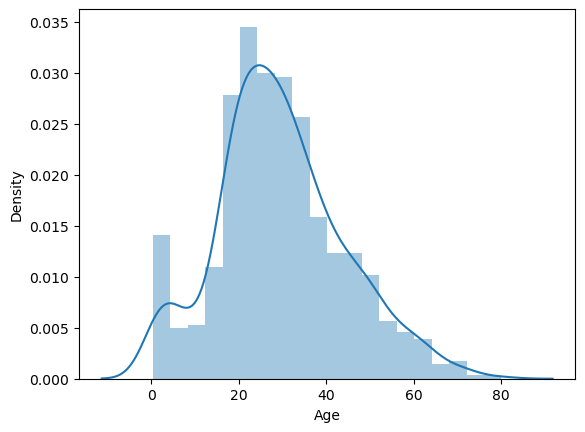

In [93]:
sns.distplot(df['Age'])

C:\Users\solan\AppData\Local\Temp\ipykernel_19496\3425841524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

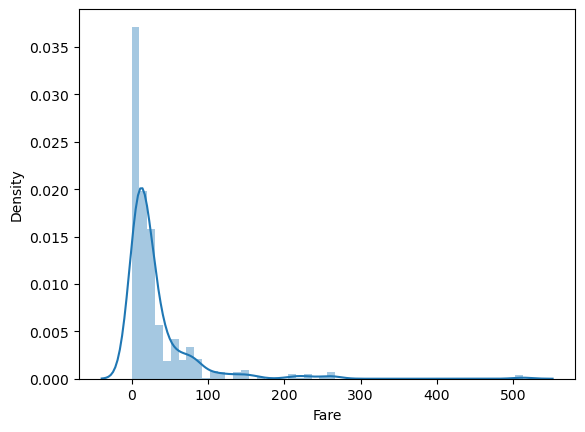

In [48]:
sns.distplot(df['Fare'])

# HANDLING NUMERICAL MISIING DATA 

####  THERE ARE 2 METHOD:
           1) SIMPLE MEAN ,MEADIAN METHOD.
           2) SKLEARN CLASS SIMPLE IMPUTER METHOD
        

# SIMPLE MEAN , MEDIAN METHOD :
#### BENEFITS : EASY TO PROCEED
##### Advantages : 
                   1) simple
                   2) we use only when missing data is >= 5%
#### Disadvantages : 
                1) Distribution of graphs get changes because we replace all with its mean values.
                2) After handling through these method we get some new outlier introduced in our dataset.
                3) Covariance and correlation also get changes.

#### When to use : 
                 1) MCAR
                 2) less then 5% missing data 

In [49]:
df['Fare'] =df['Fare'].fillna(df['Fare'].median())

In [50]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [51]:
df.isnull().sum()

Age         0
Fare        0
Family      0
Survived    0
dtype: int64

C:\Users\solan\AppData\Local\Temp\ipykernel_19496\1517717820.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])   ## changes in distribution of graph


<Axes: xlabel='Age', ylabel='Density'>

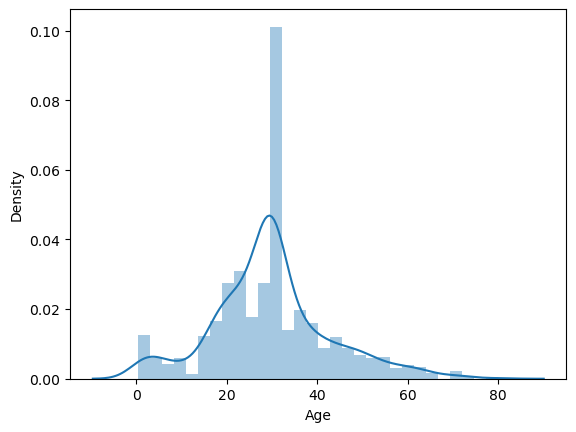

In [54]:
sns.distplot(df['Age'])   ## changes in distribution of graph


C:\Users\solan\AppData\Local\Temp\ipykernel_19496\3425841524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

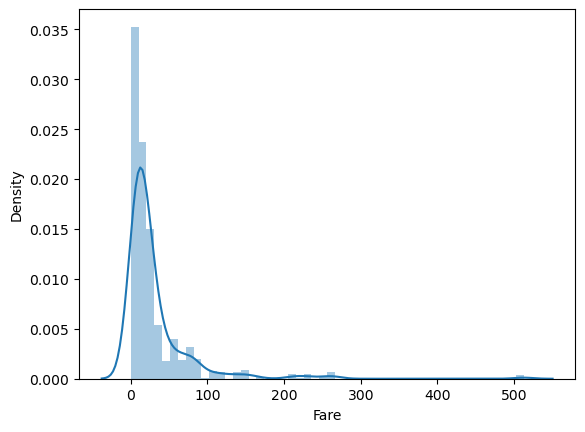

In [55]:
sns.distplot(df['Fare'])

# METHOD 2 USING SKLEARN 

In [62]:
X= df.drop(columns=['Survived'])
y=df['Survived']

C:\Users\solan\AppData\Local\Temp\ipykernel_19496\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

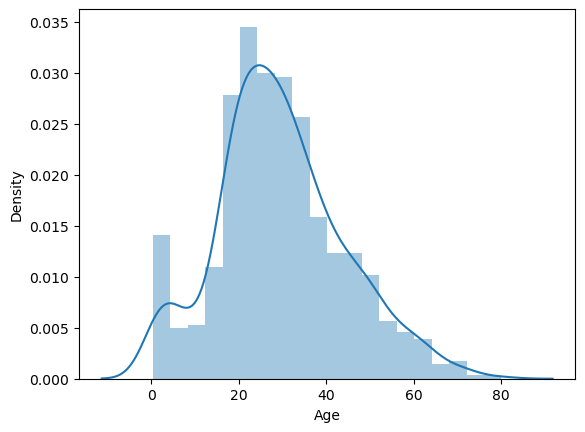

In [94]:
sns.distplot(df['Age'])

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y ,test_size =0.2 , random_state = 2)

In [100]:
from sklearn.impute import SimpleImputer


In [101]:
imputer1 = SimpleImputer(strategy = 'mean')
imputer2 = SimpleImputer(strategy ='median')

In [102]:
from sklearn.compose import ColumnTransformer


In [103]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2' , imputer2,['Fare'])
],remainder='passthrough')

In [104]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [105]:
trf.named_transformers_['imputer1'].statistics_

array([29.78590426])

In [106]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [107]:
X_train

array([[ 40.        ,  27.7208    ,   0.        ],
       [  4.        ,  16.7       ,   2.        ],
       [ 47.        ,   9.        ,   0.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ],
       [ 29.78590426, 221.7792    ,   0.        ],
       [ 29.78590426,  25.925     ,   0.        ]])

C:\Users\solan\AppData\Local\Temp\ipykernel_19496\732581193.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])  ## there is no cahnge in dist plot using SKLEARN CLASS.


<Axes: xlabel='Age', ylabel='Density'>

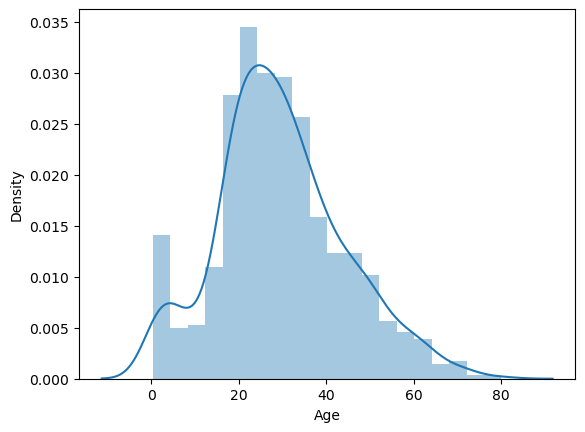

In [109]:
sns.distplot(df['Age'])  ## there is no cahnge in dist plot using SKLEARN CLASS.